<a href="https://colab.research.google.com/github/Tonmf/ProyectoIML/blob/master/Casos/Caso_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de MLT de Barcelona Telco

## Caso 4: Vino


## Data

In [ ]:
import os              # Package to use directory command to list files
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Used for plotting the graph
import matplotlib.pyplot as plt
import re

from scipy import stats # for Statistics
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Wine/winequality-red.csv')

## Data Exploration

In [ ]:
print(data.shape)
data.head(10)

(1599, 13)


fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  q2
0            7.4              0.70         0.00  ...      9.4        5   2
1            7.8              0.88         0.00  ...      9.8        5   2
2            7.8              0.76         0.04  ...      9.8        5   2
3           11.2              0.28         0.56  ...      9.8        6   2
4            7.4              0.70         0.00  ...      9.4        5   2
5            7.4              0.66         0.00  ...      9.4        5   2
6            7.9              0.60         0.06  ...      9.4        5   2
7            7.3              0.65         0.00  ...     10.0        7   2
8            7.8              0.58         0.02  ...      9.5        7   2
9            7.5              0.50         0.36  ...     10.5        5   2

[10 rows x 13 columns]

In [ ]:
data.describe()

fixed acidity  volatile acidity  ...      quality           q2
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...     5.636023     1.971857
std         1.741096          0.179060  ...     0.807569     0.223374
min         4.600000          0.120000  ...     3.000000     1.000000
25%         7.100000          0.390000  ...     5.000000     2.000000
50%         7.900000          0.520000  ...     6.000000     2.000000
75%         9.200000          0.640000  ...     6.000000     2.000000
max        15.900000          1.580000  ...     8.000000     3.000000

[8 rows x 13 columns]

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'q2'],
      dtype='object')

In [ ]:
totalt = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
q2                        0      0.0
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total sulfur dioxide      0      0.0
free sulfur dioxide       0      0.0
chlorides                 0      0.0
residual sugar            0      0.0
citric acid               0      0.0
volatile acidity          0      0.0
fixed acidity             0      0.0

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
q2                        int64
dtype: object

La base de datos está limpia y lista para entrenar los datos.

### Pairplot

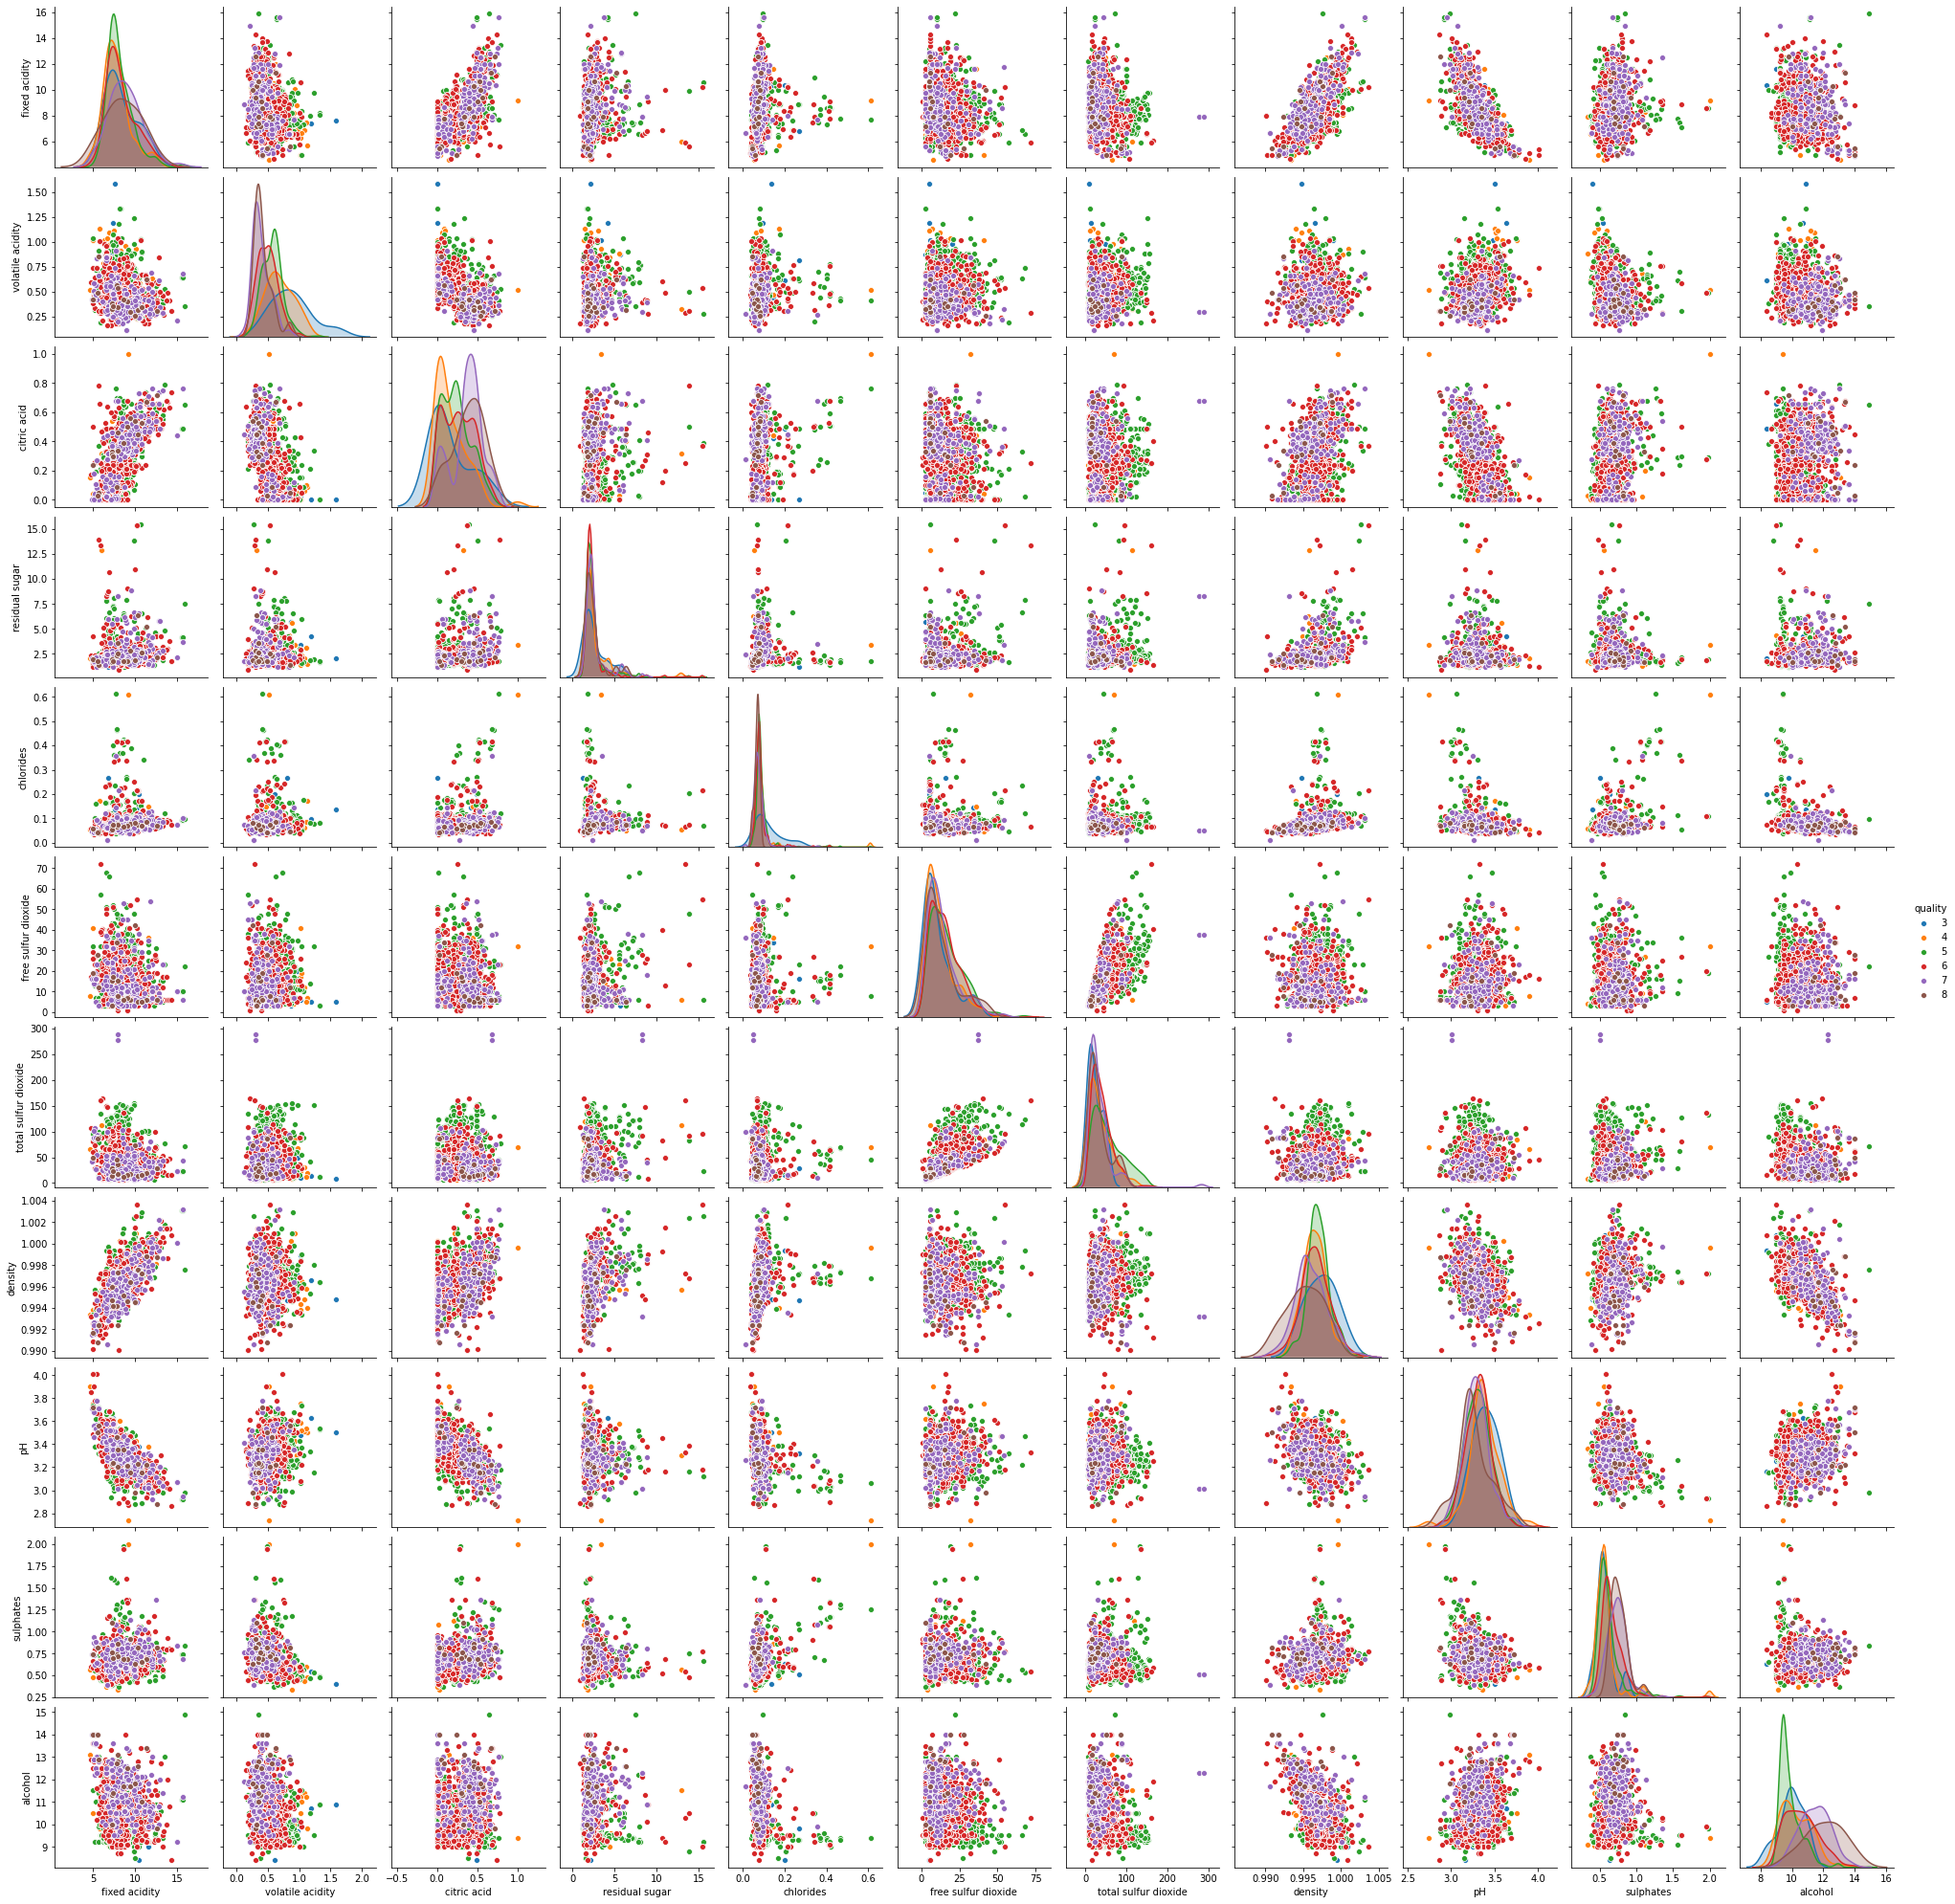

In [ ]:
import pandas as pd
import seaborn as sns
sns.pairplot(data,hue='quality')
plt.show()

## Algoritmo de Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
target = data['quality'].values
# select_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#      'pH', 'sulphates', 'alcohol']
select_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


scaler = StandardScaler()
dfScaled = scaler.fit_transform(data[select_features])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfScaled, target, test_size=0.2, random_state=42)

### Auto ML

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=300, 
          per_run_time_limit=30,
          )

# train model(s)
automl.fit(x_train, y_train)

# evaluate
y_hat = automl.predict(x_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)

### XGBoost

In [ ]:
pip install --user xgboost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Entrenamos el modelo
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Hacemos las predicciones
y_pred = model.predict(x_test)

# Evaluamos las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.00%


### Resultados

In [ ]:
# Hacemos las predicciones
y_pred = model.predict(x_test)

# Evaluamos las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.00%


In [ ]:
print("Test Accuracy score {0}".format(test_acc))
print(automl.sprint_statistics())
print(automl.show_models())

Test Accuracy score 0.646875
auto-sklearn results:
  Dataset name: 236fd53098c892a6560dc5ac7e3f9676
  Metric: accuracy
  Best validation score: 0.725768
  Number of target algorithm runs: 62
  Number of successful target algorithm runs: 59
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 1

[(0.540000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'select_percentile_classification', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adabo

Comparación de resultados:


*   AutoML: 64%
*   XGBoost: 60%

La accuracy es muy baja, procederemos a agrupar las calidades en tan solo 3 posibilidades según si son menores de 4, entre 4 y 7 y mayores de 7. De este modo reducimos la cantidad de resultados posibles por lo que facilitamos el trabajo al algoritmo.

También utilizaremos RandomForest para ver si da mejores resultados que XGBoost.



### Agrupación de calidades y nuevos resultados

#### Agrupación de calidades

In [ ]:
data2 = data
data2.shape

(1599, 12)

In [ ]:
df_agrup = data2.groupby(by=['quality'])
df_agrup.count()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol   q2
quality                                                ...                         
3                   10                10           10  ...         10       10   10
4                   53                53           53  ...         53       53   53
5                  681               681          681  ...        681      681  681
6                  638               638          638  ...        638      638  638
7                  199               199          199  ...        199      199  199
8                   18                18           18  ...         18       18   18

[6 rows x 12 columns]

In [ ]:
data2['q2'] = data2['quality'].apply(lambda x: 1 if x <= 4 else 2 if x >4 and x <=7 else 3 if x > 7 else 0)

In [ ]:
df_agrup = data2.groupby(by=['q2'])
df_agrup.count()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
q2                                                ...                             
1              63                63           63  ...         63       63       63
2            1518              1518         1518  ...       1518     1518     1518
3              18                18           18  ...         18       18       18

[3 rows x 12 columns]

#### Random Forest con 3 calidades

In [ ]:
from sklearn.preprocessing import StandardScaler
target1 = data2['q2'].values
# select_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#      'pH', 'sulphates', 'alcohol']
select_features1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


scaler1 = StandardScaler()
dfScaled1 = scaler.fit_transform(data2[select_features1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(dfScaled1, target1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report

RFC = RandomForestClassifier(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC.fit(x_train1, y_train1) 
train_prediction = RFC.predict(x_train1)
print("La accuracy es de {}.".format(accuracy_score(y_train1,train_prediction)))
print(classification_report(y_train1, train_prediction))

test_prediction = RFC.predict(x_test1)
print("La accuracy es de {}.".format(accuracy_score(y_test1, test_prediction)))
print(classification_report(y_test1, test_prediction))

La accuracy es de 0.9538702111024238.
              precision    recall  f1-score   support

           1       1.00      0.12      0.21        52
           2       0.95      1.00      0.98      1214
           3       0.00      0.00      0.00        13

    accuracy                           0.95      1279
   macro avg       0.65      0.37      0.39      1279
weighted avg       0.95      0.95      0.94      1279



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La accuracy es de 0.95.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.95      1.00      0.97       304
           3       0.00      0.00      0.00         5

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost con 3 calidades

In [ ]:
# Entrenamos el modelo
model1 = XGBClassifier()
model1.fit(x_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Hacemos las predicciones
y_pred1 = model1.predict(x_test1)

# Evaluamos las predicciones
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 94.38%


#### Nuevos resultados

Al agrupar los resultados de quality en 3 grupos, el resultado de **XGBoost ha subido del 60% al 94% de accuracy**. Pero RandomForest está un pasito por delante llegando al 95% de accuracy.

*   XGBoost: 94%
*   RandomForest: 95%



## Mejores features

### Recursive feature elimination

Da la casualidad que me vivo en el Penedès, zona conocida por su dedicación a la producción de vino. Además, conozco a un profesional que se dedica al mundo del vino y le pregunté cuáles eran las caraterísticas más importantes desde su punto de vista para después compararlas con SVC y ver quien obtenia mejores resultados.

Las características que escoge mi querdio compañero son: 

1.   volatile acidity
2.   total sulfur dioxide
3.   free sulfur dioxide
4.   residual sugar
5.   pH

Ahora utilizaremos el SVC para determinar cuáles son las 5 características más importantes y ver si coinciden.

In [ ]:
x=data2[select_features]
y=data2['q2']

print('x shape:{}'.format(x.shape))
print('y shape:{}'.format(y.shape))

x shape:(1599, 11)
y shape:(1599,)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=5, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False  True  True  True False False False False  True False  True]
Raking of the features: [4 1 1 1 2 6 7 5 1 3 1]


In [ ]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Las métricas más importantes según SVC son:
1.   volatile acidity
2.   citric acid
3.   residual sugar
4.   pH
5.   alcohol

Coinciden en **volatile acidity**, **pH** y **residual sugar**.

Procedemos a comprarlos con un algoritmo...

### Random Forest y comparación SVC vs Profesional

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### **Resultado SVC**

In [ ]:
from sklearn.preprocessing import StandardScaler
target2 = data2['q2'].values
# select_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#      'pH', 'sulphates', 'alcohol']
select_features2 = ['volatile acidity','citric acid','residual sugar', 'pH', 'alcohol']


scaler2 = StandardScaler()
dfScaled2 = scaler2.fit_transform(data[select_features2])

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(dfScaled2, target2, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report

RFC2 = RandomForestClassifier(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC2.fit(x_train2, y_train2) 
train_prediction2 = RFC2.predict(x_train2)
print("La accuracy es de {}.".format(accuracy_score(y_train2,train_prediction2)))
print(classification_report(y_train2, train_prediction2))

test_prediction2 = RFC2.predict(x_test2)
print("La accuracy es de {}.".format(accuracy_score(y_test2, test_prediction2)))
print(classification_report(y_test2, test_prediction2))

La accuracy es de 0.9562157935887412.
              precision    recall  f1-score   support

           1       1.00      0.17      0.30        52
           2       0.96      1.00      0.98      1214
           3       0.00      0.00      0.00        13

    accuracy                           0.96      1279
   macro avg       0.65      0.39      0.42      1279
weighted avg       0.95      0.96      0.94      1279



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La accuracy es de 0.94375.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.95      0.99      0.97       304
           3       0.00      0.00      0.00         5

    accuracy                           0.94       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.94      0.92       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Resultado profesional**

In [ ]:
from sklearn.preprocessing import StandardScaler
target3 = data2['q2'].values
# select_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#      'pH', 'sulphates', 'alcohol']
select_features3 = ['volatile acidity','total sulfur dioxide','pH', 'free sulfur dioxide', 'residual sugar']


scaler3 = StandardScaler()
dfScaled3 = scaler3.fit_transform(data[select_features3])

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(dfScaled3, target3, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report

RFC3 = RandomForestClassifier(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC3.fit(x_train3, y_train3) 
train_prediction3 = RFC3.predict(x_train3)
print("La accuracy es de {}.".format(accuracy_score(y_train3,train_prediction3)))
print(classification_report(y_train3, train_prediction3))

test_prediction3 = RFC3.predict(x_test3)
print("La accuracy es de {}.".format(accuracy_score(y_test3, test_prediction3)))
print(classification_report(y_test3, test_prediction3))

La accuracy es de 0.9538702111024238.
              precision    recall  f1-score   support

           1       1.00      0.12      0.21        52
           2       0.95      1.00      0.98      1214
           3       0.00      0.00      0.00        13

    accuracy                           0.95      1279
   macro avg       0.65      0.37      0.39      1279
weighted avg       0.95      0.95      0.94      1279



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La accuracy es de 0.95.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.95      1.00      0.97       304
           3       0.00      0.00      0.00         5

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bueno pues queridos compañeros, los humanos han ganado la competición a las máquinas. Las características esogidas por un profesional dan un mejor resultado en test por un ajustado **94% SVC** a **95% Profesional**!

 ## Discusión y Conclusiones

En una primera parte vemos que reducir la cantidad de resultados a predecir (quality) ha mejorado el resultado del algoritmo de forma espectacular, aumentado la accuracy de un 60% a un 95%.

En una segunda parte hemos comparado una reducción de características que haría un experto del sector contra SVC. Han coincidido en 3 de las 5 características. Al utilizar un algoritmo y comparar los resultados, el profesional ha superado por la mínima a SVC. (Por lo que podemos concluir que su sueldo está justificado!)

## Linias de desarrollo futuro

### Annexo 1


### Annexo 2